<a href="https://colab.research.google.com/github/Andrius-M/Lithuanian-parlament-votes/blob/master/Votes_Project_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hello!**

**This is my data science project on Lithuanian parlament votes data set.**

Below you'll find some charts and usefull queries on this data set. 
Data set was taken from there: https://www.kaggle.com/sirexo/lithuanian-paliament-votes

In [1]:
!pip install -qq toai

     |████████████████████████████████| 81kB 3.1MB/s 
     |████████████████████████████████| 28.6MB 151kB/s 
     |████████████████████████████████| 296kB 43.2MB/s 
     |████████████████████████████████| 552kB 41.6MB/s 
     |████████████████████████████████| 102kB 11.5MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 747kB 35.8MB/s 


In [2]:
from toai.imports import *
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/toai/imports.py:79: UserWarning: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
  warnings.warn(str(error))


**Next few sections is about loading my votes.csv file from my Google Drive**

In [3]:
# https://www.youtube.com/watch?v=oqMImCeXi6o
# STEP-1: Import Libraries 
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
# STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
# STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'1Bz3Hn2r4RC7T6Vtqg1GGYXAenkpZLxea'}) # replace the id with id of file you want to access
downloaded.GetContentFile('votes.csv') 

In [ ]:
#!ls

In [8]:
df = pd.read_csv("votes.csv", low_memory=False)

In [ ]:
#df.describe()

In [7]:
df = df.dropna()

In [9]:
df["time_yyyy_mm_dd"] = df["time"].str[:10]
df["time_yyyy"] = df["time"].str[:4]
df = df.sort_values("time_yyyy", ascending=True)
df.head()

,voting_id,voter_id,time,group,voter,question,sitting_type,vote,n_eligible_voters,n_voters,time_yyyy_mm_dd,time_yyyy
2776668,210,7254,1997-10-28 11:12:40,SDF,Valatka Jonas,NaN,rytinis,1.0,136,114,1997-10-28,1997
2776895,214,155,1997-10-28 12:20:47,CF,Glaveckas Kęstutis,NaN,rytinis,1.0,136,67,1997-10-28,1997
2776896,214,101,1997-10-28 12:20:47,TSLK,Hofertienė Romualda,NaN,rytinis,-1.0,136,67,1997-10-28,1997
2776897,214,7266,1997-10-28 12:20:47,TSLK,Jackūnas Žibartas Juozas,NaN,rytinis,-1.0,136,67,1997-10-28,1997
2776898,214,107,1997-10-28 12:20:47,TSLK,Jarmolenko Vladimir,NaN,rytinis,1.0,136,67,1997-10-28,1997


**How many different parties we had during 1999-2017**

In [10]:
df_uniq_parties = pd.unique(df["group"])
print(
    "During 20 years in parlament we had "
    + str(len(df_uniq_parties))
    + " different parties. These are:"
    + str(df_uniq_parties).replace("[", "").replace("]", "")
)

During 20 years in parlament we had 38 different parties. These are:'SDF' 'CF' 'TSLK' 'KDF' 'LDDP' nan 'JF' 'NF' 'MG' 'SDF2000' 'MKDF' 'NSF'
 'LF' 'SDKF' 'TSKF' 'NKF' 'JDTLF' 'VNDF' 'LDF' 'LCSF' 'JLF' 'DPF' 'LSDPF'
 'TSF' 'VLF' 'TTF' 'PDF' 'LSF' 'VLPD' 'TS-LKDF' 'TPPF' 'AŽF' 'KPF' 'DKF'
 'LLRAF' 'LLRA-KŠSF' 'LVŽSF' 'LSDDF'


**How many different parlamanet members we had during 1999-2017**

In [11]:
df_uniq_voters = pd.unique(df["voter"])
print(
    "During 20 years in parlament we had "
    + str(len(df_uniq_voters))
    + " different parlament members"
)

During 20 years in parlament we had 531 different parlament members


**Amount of unique and total questions during 1999-2017**

In [12]:
df_uniq_quest = pd.unique(df["question"])
df_total_quest = pd.unique(df["voting_id"])
print(
    "During 20 years in parlament we had "
    + str(len(df_uniq_quest))
    + " different questions for voting. Total amount of questions was: "
    + str(len(df_total_quest))
)

During 20 years in parlament we had 11648 different questions for voting. Total amount of questions was: 40925


**Number of parties during each years in the period of 1999 - 2017**

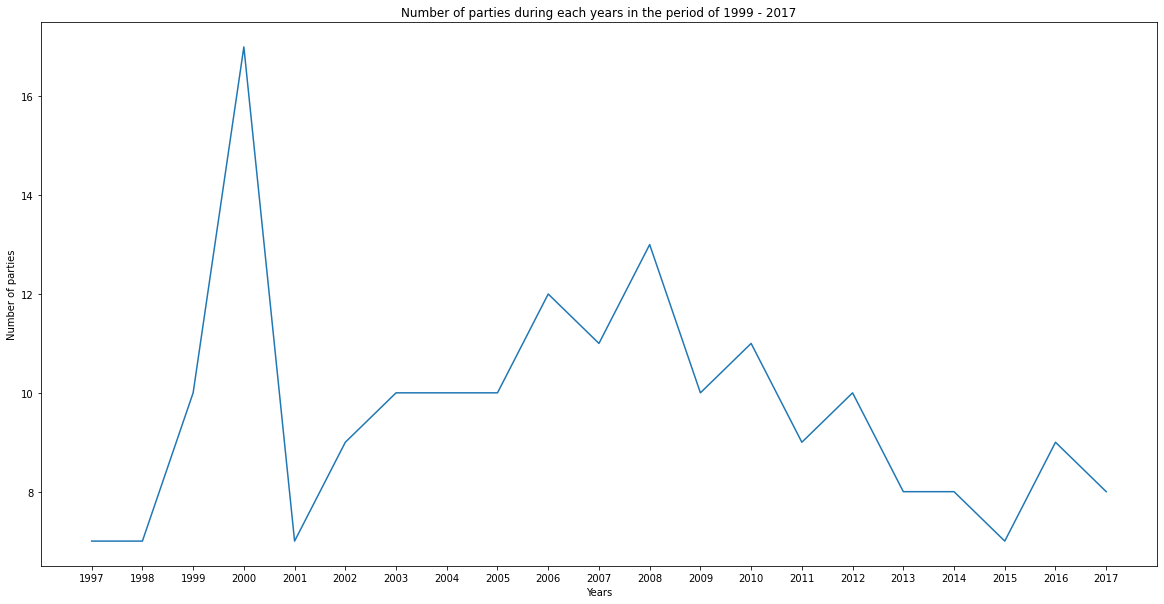

In [13]:
q_df = df.groupby("time_yyyy")["group"].nunique()

plt.figure(figsize=(20, 10))
plt.title("Number of parties during each years in the period of 1999 - 2017")
plt.xlabel("Years")
plt.ylabel("Number of parties")
sns.lineplot(data=q_df, label="")

**How many each type of sittings in total during all period (1999-2017)**


In [14]:
df_sitting_type_morning = df.where(df["sitting_type"] == "rytinis")
df_sitting_type_evening = df.where(df["sitting_type"] == "vakarinis")
df_sitting_type_additional = df.where(df["sitting_type"] == "neeilinis")
df_sitting_type_not_planed = df.where(df["sitting_type"] == "nenumatytas")

df_sitting_type_morning_count = df_sitting_type_morning["voting_id"].value_counts()
df_sitting_type_evening_count = df_sitting_type_evening["voting_id"].value_counts()
df_sitting_type_additional_count = df_sitting_type_additional[
    "voting_id"
].value_counts()
df_sitting_type_not_planed_count = df_sitting_type_not_planed[
    "voting_id"
].value_counts()

print("Morning sittings in total: " + str(len(df_sitting_type_morning_count)))
print("Evening sittings in total: " + str(len(df_sitting_type_evening_count)))
print("Additional sittings in total: " + str(len(df_sitting_type_additional_count)))
print("Not Planned sittings in total: " + str(len(df_sitting_type_not_planed_count)))

Morning sittings in total: 24343
Evening sittings in total: 14196
Additional sittings in total: 2235
Not Planned sittings in total: 151


**How many each type of sittings were over the years**

In [15]:
mor = df_sitting_type_morning.groupby("time_yyyy")["voting_id"].nunique()
mor = mor.to_frame().rename(columns={"voting_id": "Morning"})
eve = df_sitting_type_evening.groupby("time_yyyy")["voting_id"].nunique()
eve = eve.to_frame().rename(columns={"voting_id": "Evening"})
add = df_sitting_type_additional.groupby("time_yyyy")["voting_id"].nunique()
add = add.to_frame().rename(columns={"voting_id": "Additional"})
nPlan = df_sitting_type_not_planed.groupby("time_yyyy")["voting_id"].nunique()
nPlan = nPlan.to_frame().rename(columns={"voting_id": "NotPlanned"})

df_merged = pd.concat([mor, eve, add, nPlan], axis=1).reset_index()
df_merged.set_index("index", inplace=True)

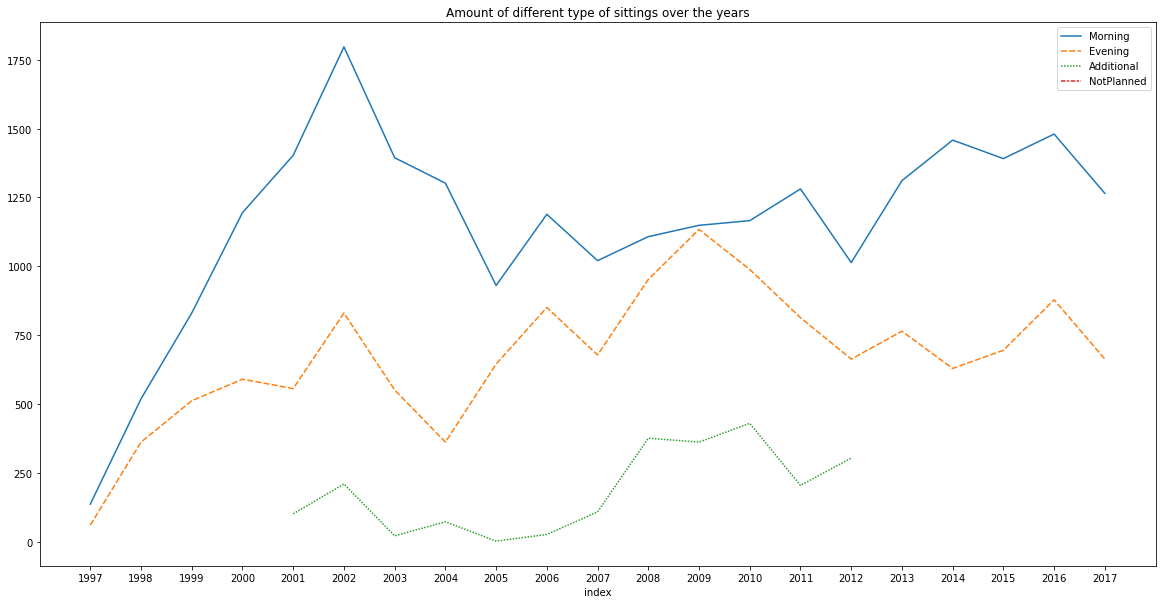

In [17]:
plt.figure(figsize=(20, 10))
plt.title("Amount of different type of sittings over the years")
sns.lineplot(data=df_merged)

**How many votes in total were during the period (1999-2017) for each type of sittings**

In [18]:
print(df.sitting_type.value_counts())

rytinis        1837593
vakarinis       917202
neeilinis       167034
nenumatytas      12109
Name: sitting_type, dtype: int64


**Riddle!!! Don't look to the code and try guess what is this chart about :)**

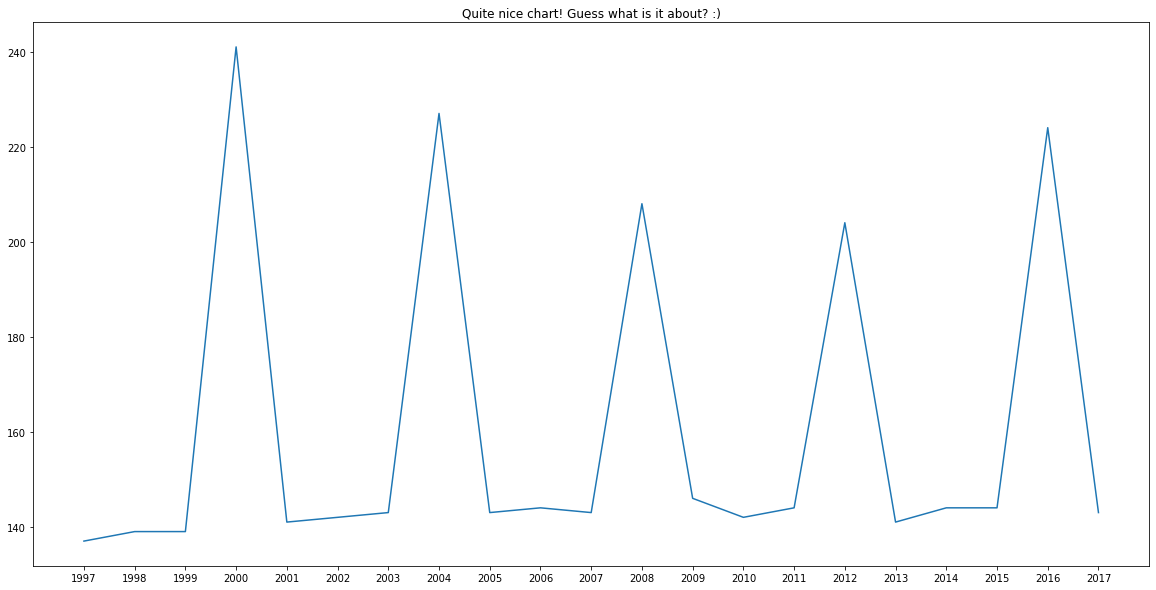

In [19]:
q_df = df.groupby("time_yyyy")["voter"].nunique()
plt.figure(figsize=(20, 10))
plt.title("Quite nice chart! Guess what is it about? :)")
sns.lineplot(data=q_df, label="")

**Total amount of votings per years**

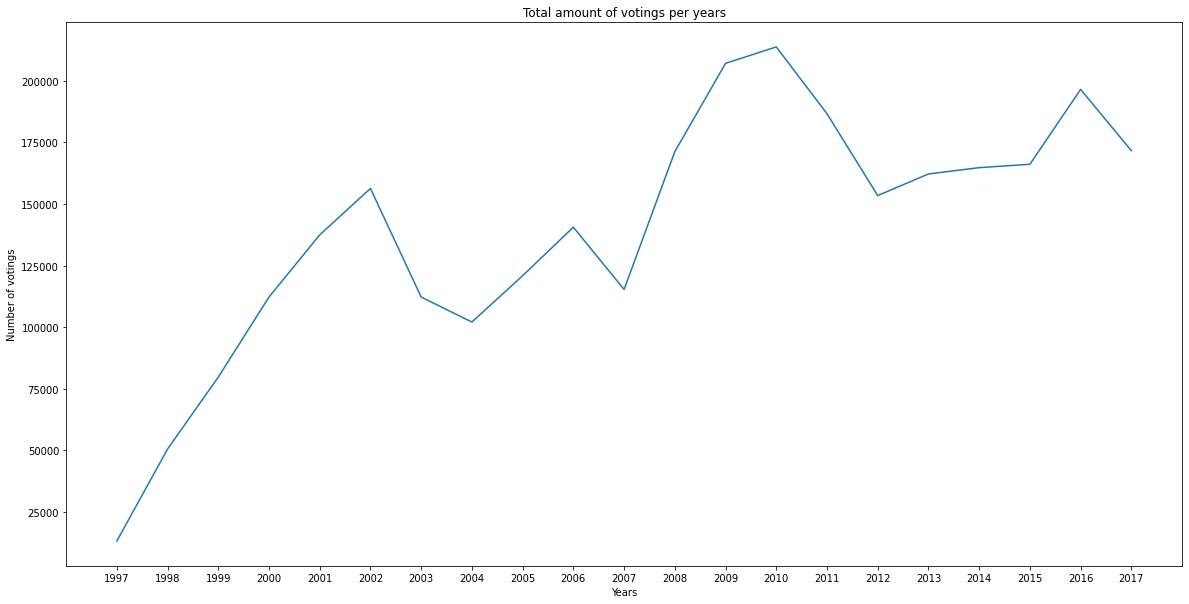

In [20]:
votes = df.groupby("time_yyyy").voter.count()

plt.figure(figsize=(20, 10))
plt.title("Total amount of votings per years")
plt.xlabel("Years")
plt.ylabel("Number of votings")
sns.lineplot(data=votes, label="")

**To which political party does a member of the Parlament belongs?**

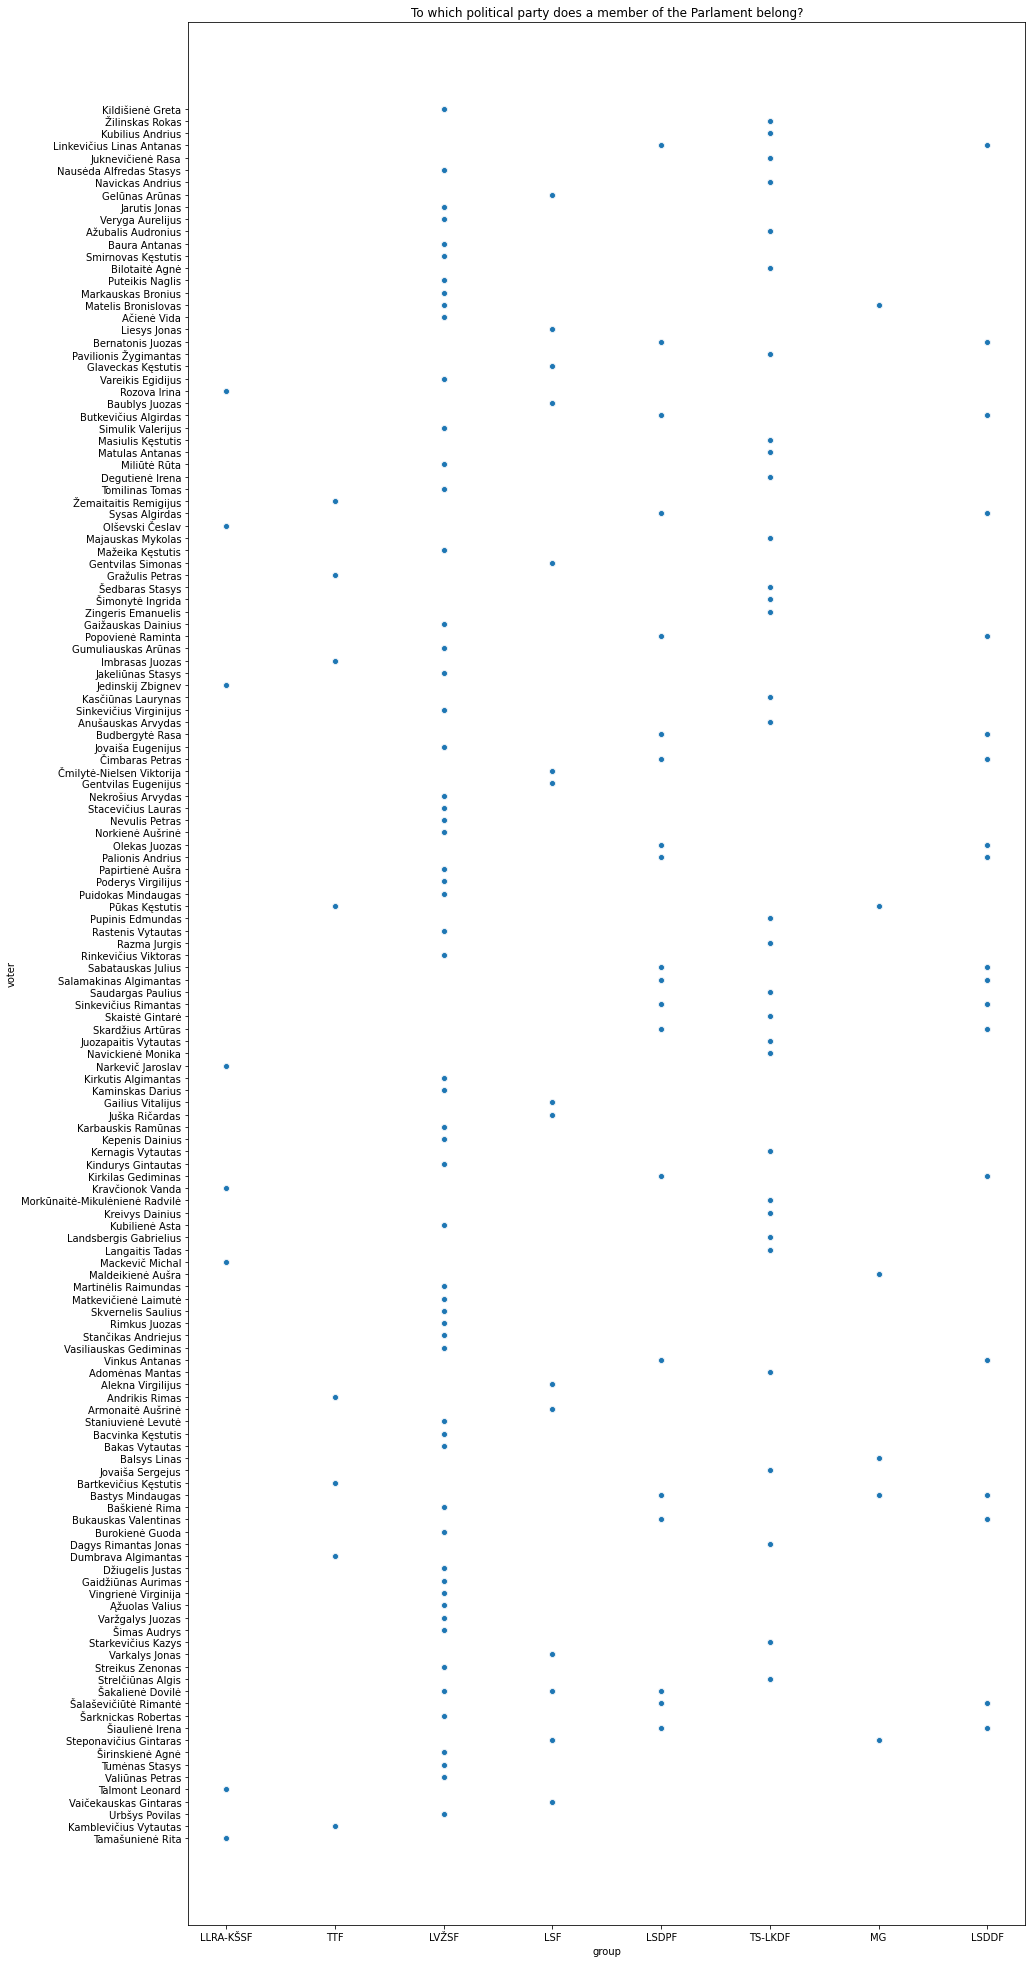

In [21]:
df_scatter = df.where(df['time_yyyy'] == '2017')
plt.figure(figsize=(15,35))
plt.title("To which political party does a member of the Parlament belong?")
plt.xlabel("")
plt.ylabel("")
sns.scatterplot(x=df_scatter['group'], y=df_scatter['voter'])

**I've made a list of Parlament members who was elected to Parlament and worked during all this period (1999-2017)
Line plot of Voting Activity of Parlament members who was elected to Parlament and worked during all this period (1999-2017)**

In [22]:
a_dic = {}
a_only_ = {}
for number in range(1999, 2018):
    a_dic["only_%s" % number] = df[["voter_id", "voter", "time_yyyy"]].where(
        df["time_yyyy"] == str(number)
    )
    a_dic["only_%s" % number] = a_dic["only_%s" % number]["voter"].unique()
    a_only_["only_%s" % number] = a_dic["only_%s" % number].tolist()

elements_in_all = list(
    set.intersection(
        *map(
            set,
            [
                a_only_["only_2017"],
                a_only_["only_2016"],
                a_only_["only_2015"],
                a_only_["only_2014"],
                a_only_["only_2013"],
                a_only_["only_2012"],
                a_only_["only_2011"],
                a_only_["only_2010"],
                a_only_["only_2009"],
                a_only_["only_2008"],
                a_only_["only_2007"],
                a_only_["only_2006"],
                a_only_["only_2005"],
                a_only_["only_2004"],
                a_only_["only_2003"],
                a_only_["only_2002"],
                a_only_["only_2001"],
                a_only_["only_2000"],
                a_only_["only_1999"],
            ],
        )
    )
)
print(elements_in_all)

['Šiaulienė Irena', 'Salamakinas Algimantas', 'Kirkilas Gediminas', 'Butkevičius Algirdas', 'Juknevičienė Rasa', 'Gražulis Petras', 'Degutienė Irena', 'Sysas Algirdas', 'Glaveckas Kęstutis', 'Olekas Juozas', 'Razma Jurgis', 'Kubilius Andrius']


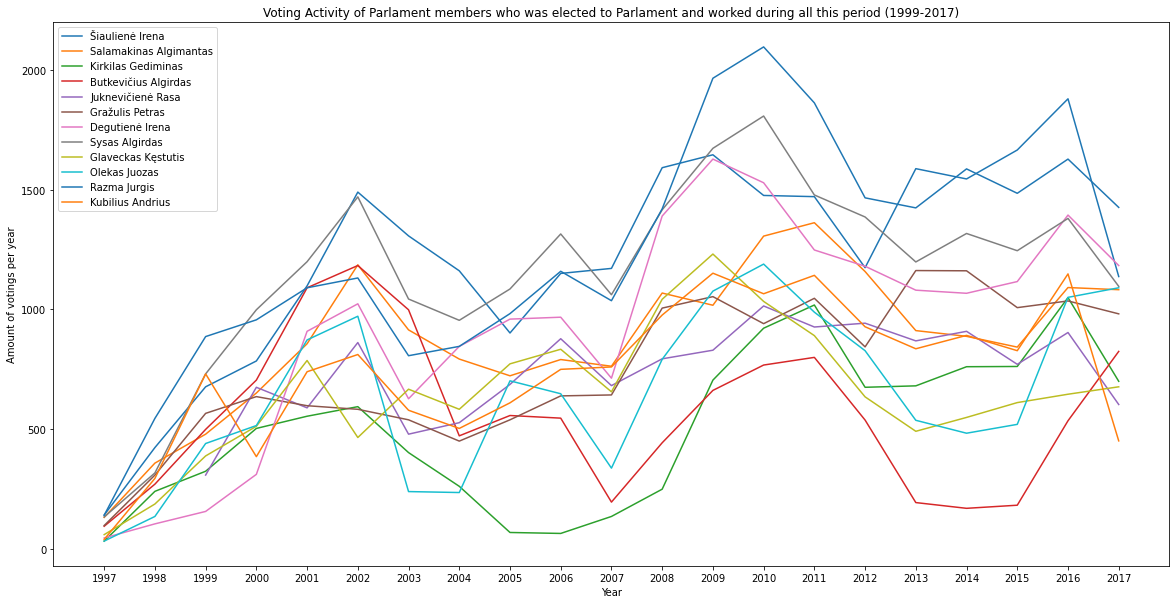

In [23]:
members1 = elements_in_all

df1 = pd.DataFrame()
all = pd.DataFrame()
for i in members1:
    df1[i] = (
        df[df["voter"] == i].groupby(["time_yyyy"]).size()
    )  
    all = all.append(df1[i], ignore_index=True)

all["vardai"] = members1
all.reset_index()

plt.figure(figsize=(20, 10))
plt.title(
    "Voting Activity of Parlament members who was elected to Parlament and worked during all this period (1999-2017)"
)
plt.xlabel("Year")
plt.ylabel("Amount of votings per year")

all_1 = all.drop(
    columns="vardai"
)  

for i in range(len(all)):
    sns.lineplot(data=all_1.iloc[i], label=all.iloc[i]["vardai"])

**Heatmap of Voting Activity of Parlament members who was elected to Parlament and worked during all this period (1999-2017)**

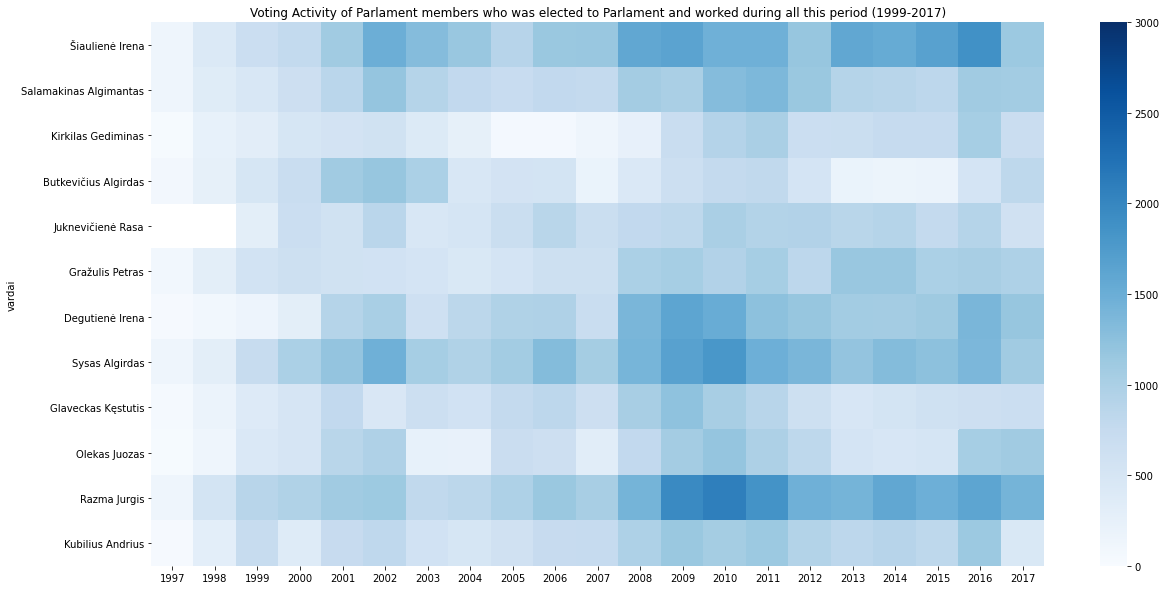

In [24]:
total_votes = all
total_votes.set_index("vardai", inplace=True)
votes1 = total_votes

plt.figure(figsize=(20, 10))
plt.title(
    "Voting Activity of Parlament members who was elected to Parlament and worked during all this period (1999-2017)"
)  
plt.xlabel("Years")
plt.ylabel("Number of votes per year")
sns.heatmap(data=votes1, annot=False, cmap="Blues", vmin=0, vmax=3000)

**Votes amout of parlament member in %**

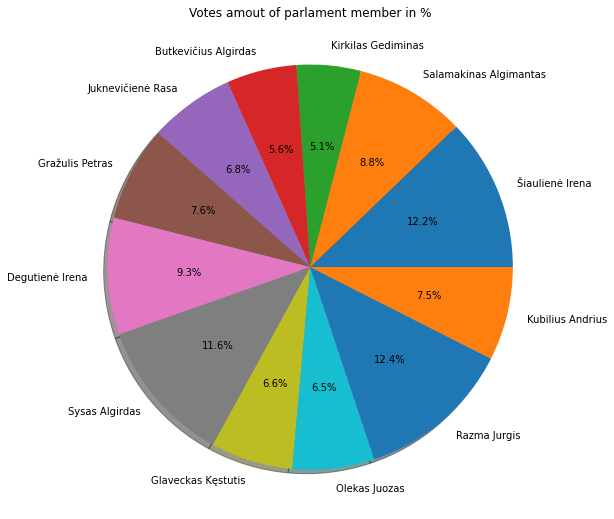

In [25]:
total_votes["Total"] = all.sum(axis=1)
sizes = total_votes["Total"]
sizes_df = pd.DataFrame({"voter": sizes.index, "Total": sizes.values})

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=sizes_df["voter"], autopct="%1.1f%%", shadow=True)
fig1.set_size_inches(8, 9)
ax1.axis("equal")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title("Votes amout of parlament member in %")

plt.show()

**PARLAMENTS ACCORDING OFFITIAL BEGINNING AND END DATES**
`# https://apps.lrs.lt/sip/p2b.ad_seimo_kadencijos`

**Parlaments and amounts of members in them**

In [26]:
df_S_90 = df[
    (df["time_yyyy_mm_dd"] > "1990-03-10") & (df["time_yyyy_mm_dd"] < "1992-11-22")
].sort_values(by="time", ascending=True)
uniq_90 = pd.unique(df_S_90["voter"])
df_S_92 = df[
    (df["time_yyyy_mm_dd"] > "1992-11-24") & (df["time_yyyy_mm_dd"] < "1996-11-22")
].sort_values(by="time", ascending=True)
uniq_92 = pd.unique(df_S_92["voter"])
df_S_96 = df[
    (df["time_yyyy_mm_dd"] > "1996-11-25") & (df["time_yyyy_mm_dd"] < "2000-10-18")
].sort_values(by="time", ascending=True)
uniq_96 = pd.unique(df_S_96["voter"])
df_S_00 = df[
    (df["time_yyyy_mm_dd"] > "2000-10-19") & (df["time_yyyy_mm_dd"] < "2004-11-14")
].sort_values(by="time", ascending=True)
uniq_00 = pd.unique(df_S_00["voter"])
df_S_04 = df[
    (df["time_yyyy_mm_dd"] > "2004-11-15") & (df["time_yyyy_mm_dd"] < "2008-11-16")
].sort_values(by="time", ascending=True)
uniq_04 = pd.unique(df_S_04["voter"])
df_S_08 = df[
    (df["time_yyyy_mm_dd"] > "2008-11-17") & (df["time_yyyy_mm_dd"] < "2012-11-16")
].sort_values(by="time", ascending=True)
uniq_08 = pd.unique(df_S_08["voter"])
df_S_12 = df[
    (df["time_yyyy_mm_dd"] > "2012-11-16") & (df["time_yyyy_mm_dd"] < "2016-11-14")
].sort_values(by="time", ascending=True)
uniq_12 = pd.unique(df_S_12["voter"])
df_S_16 = df[(df["time_yyyy_mm_dd"] > "2016-11-14")].sort_values(
    by="time", ascending=True
)
uniq_16 = pd.unique(df_S_16["voter"])

print("Amount of parlament members in each")
print("Amount in 1990`th parlament: " + str(len(uniq_90)))
print("Amount in 1992`th parlament: " + str(len(uniq_92)))
print("Amount in 1996`th parlament: " + str(len(uniq_96)))
print("Amount in 2000`th parlament: " + str(len(uniq_00)))
print("Amount in 2004`th parlament: " + str(len(uniq_04)))
print("Amount in 2008`th parlament: " + str(len(uniq_08)))
print("Amount in 2012`th parlament: " + str(len(uniq_12)))
print("Amount in 2016`th parlament: " + str(len(uniq_16)))

Amount of parlament members in each
Amount in 1990`th parlament: 0
Amount in 1992`th parlament: 0
Amount in 1996`th parlament: 145
Amount in 2000`th parlament: 150
Amount in 2004`th parlament: 150
Amount in 2008`th parlament: 152
Amount in 2012`th parlament: 150
Amount in 2016`th parlament: 143


**How many unique votings parties participated during Parlament 2012-2016**

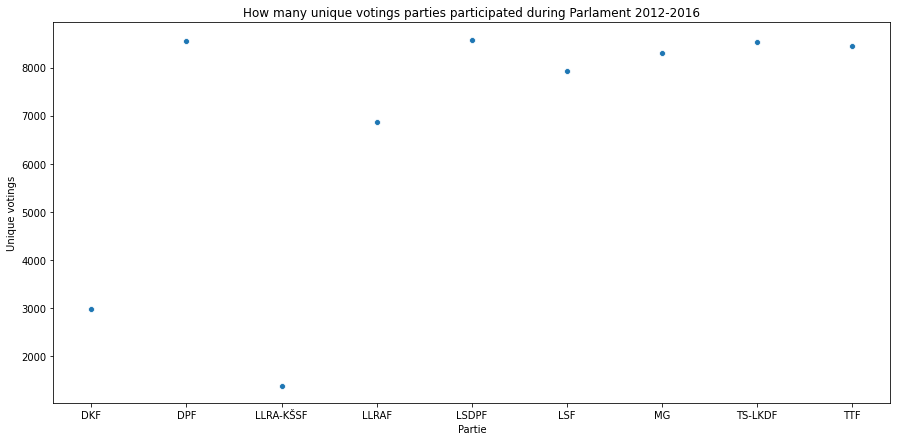

In [27]:
parties_12 = df_S_12.groupby("group")["voting_id"].nunique()
df_scatter_1 = pd.DataFrame(
    {"Partie": parties_12.index, "Unique votings": parties_12.values}
)

plt.figure(figsize=(15, 7))
plt.title("How many unique votings parties participated during Parlament 2012-2016")
plt.xlabel("")
plt.ylabel("")
sns.scatterplot(x=df_scatter_1["Partie"], y=df_scatter_1["Unique votings"])

In [28]:
# NEXT LINE OF CODE CRASHES THE SESSION AFTER USING ALL RAM :)
# only_SG = df[['voter_id', 'voter', 'time_yyyy']].where(df['voter'] == 'Steponavičius Gintaras') & (df['time_yyyy'] == '2015')